# Imports

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

c:\Users\castr\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Bases

In [2]:
#Import the training data
train = pd.read_csv('https://github.com/tcastrom/CEFR-French-/raw/main/Data/training_data.csv')
train.set_index('id', inplace=True)
display(train.head())

#Import the unlabel data
unlabel = pd.read_csv('https://github.com/tcastrom/CEFR-French-/raw/main/Data/unlabelled_test_data.csv')
unlabel.set_index('id', inplace=True)
display(unlabel.head())

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


# Encoding of the Data

In [3]:
# Encode the difficulty column using LabelEncoder
le = LabelEncoder()
train['difficulty'] = le.fit_transform(train['difficulty'])

# Display how the difficulty has been encoded and the values associated with each encoding
display(le.classes_)
print(f'The values [0, 1, 2, 3, 4, 5] are represented by{le.inverse_transform([0, 1, 2, 3, 4, 5])}')

array(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], dtype=object)

The values [0, 1, 2, 3, 4, 5] are represented by['A1' 'A2' 'B1' 'B2' 'C1' 'C2']


In [4]:
# Create X and y
X = train['sentence']
y = train['difficulty']

# Split the data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the vectorizer on the testing data
X_test = vectorizer.transform(X_test)

# Linear Regression

In [6]:
# Do a linear regression 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict the difficulty on the testing data
y_pred = linear_regression.predict(X_test)

# Round the predictions to the nearest integer and make sure the values are between 0 and 5
y_pred = np.round(y_pred)
y_pred[y_pred < 0] = 0
y_pred[y_pred > 5] = 5

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred.astype(int))

# Calculate the accuracy
accuracy_reg_lin = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_reg_lin}')

# Calculate the Precision 
precision_reg_lin = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_reg_lin}')

# Calculate the Recall
recall_reg_lin = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_reg_lin}')

# Calculate the F1 Score
f1_reg_lin = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_reg_lin}')

Accuracy: 0.26458333333333334
Precision: 0.2502562030083607
Recall: 0.26458333333333334
F1 Score: 0.25270693757433055


# Logistic  Regression with cross validation

In [7]:
# Do a logistic regression woth cross validation
from sklearn.linear_model import LogisticRegressionCV

# Create a logistic regression object
logistic_regression = LogisticRegressionCV(cv=5, max_iter=1000)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict the difficulty on the testing data
y_pred = logistic_regression.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_log_reg = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_log_reg}')

# Calculate the Precision
precision_log_reg = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_log_reg}')

# Calculate the Recall
recall_log_reg = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_log_reg}')

# Calculate the F1 Score
f1_log_reg = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_log_reg}')




Accuracy: 0.471875
Precision: 0.4676454066489516
Recall: 0.471875
F1 Score: 0.4673314414307995


# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a base model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

print(f"The best parameters are : {best_params_knn}")

The best parameters are : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [9]:
# Retrieve the best model
best_model_knn = grid_search_knn.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_knn.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_knn}')

# Calculate the Precision
precision_knn = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_knn}')

# Calculate the Recall
recall_knn = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_knn}')

# Calculate the F1 Score
f1_knn = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_knn}')

Accuracy: 0.35833333333333334
Precision: 0.40422399185184915
Recall: 0.35833333333333334
F1 Score: 0.3464204117405712


In [10]:
# Decision Tree with GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 11),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Create a base model
dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

print(f"The best parameters are : {best_params_dt}")

c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9600 fits failed out of a total of 28800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\castr\anaconda3\Lib\site-pa

The best parameters are : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.17916667 0.16822917 0.16901042]
  warnings.warn(


In [11]:
# Retrieve the best model
best_model_dt = grid_search_dt.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_dt.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_dt}')

# Calculate the Precision
precision_dt = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_dt}')

# Calculate the Recall
recall_dt = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_dt}')

# Calculate the F1 Score
f1_dt = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_dt}')


Accuracy: 0.225
Precision: 0.24208033550203492
Recall: 0.225
F1 Score: 0.1574943254423193


c:\Users\castr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest

In [12]:
# Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"The best parameters are : {best_params_rf}")

c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3600 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\castr\anaconda3\Lib\site-pa

The best parameters are : {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
# Retrieve the best model
best_model_rf = grid_search_rf.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_rf.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_rf}')

# Calculate the Precision
precision_rf = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_rf}')

# Calculate the Recall
recall_rf = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_rf}')

# Calculate the F1 Score
f1_rf = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_rf}')

Accuracy: 0.375
Precision: 0.36757037874376164
Recall: 0.375
F1 Score: 0.3404847778939029


# Suport Vector Machine

In [14]:
# Support Vector Machine with GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create a base model
svm = SVC()

# Instantiate the grid search model
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_
print(f"The best parameters are : {best_params_svm}")

The best parameters are : {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [15]:
# Retrieve the best model
best_model_svm = grid_search_svm.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_svm.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_svm}')

# Calculate the Precision
precision_svm = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_svm}')

# Calculate the Recall
recall_svm = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_svm}')

# Calculate the F1 Score
f1_svm = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_svm}')


Accuracy: 0.4791666666666667
Precision: 0.47571073217035076
Recall: 0.4791666666666667
F1 Score: 0.4760176557790857


# Naive Bayes

In [16]:
# Naive Bayes with GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid_nb = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}

# Create a base model
nb = MultinomialNB()

# Instantiate the grid search model
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5)

# Fit the grid search to the data
grid_search_nb.fit(X_train, y_train)

# Get the best parameters
best_params_nb = grid_search_nb.best_params_
print(f"The best parameters are : {best_params_nb}")


The best parameters are : {'alpha': 1, 'fit_prior': True}


In [17]:
# Retrieve the best model
best_model_nb = grid_search_nb.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_nb.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_nb = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_nb}')

# Calculate the Precision
precision_nb = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_nb}')

# Calculate the Recall
recall_nb = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_nb}')

# Calculate the F1 Score
f1_nb = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_nb}')


Accuracy: 0.45416666666666666
Precision: 0.4689134938302318
Recall: 0.45416666666666666
F1 Score: 0.4523446042056213


# Stochastic Gradient Descent

In [18]:
# Stochastic Gradient Descent with GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the parameter grid
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000]
}

# Create a base model
sgd = SGDClassifier()

# Instantiate the grid search model
grid_search_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid_sgd, cv=5)

# Fit the grid search to the data
grid_search_sgd.fit(X_train, y_train)

# Get the best parameters
best_params_sgd = grid_search_sgd.best_params_
print(f"The best parameters are : {best_params_sgd}")

c:\Users\castr\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\linear_mo

The best parameters are : {'alpha': 0.001, 'loss': 'squared_hinge', 'max_iter': 5000, 'penalty': 'l2'}


c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\castr\anaconda3\Lib\site-packag

In [19]:
# Retrieve the best model
best_model_sgd = grid_search_sgd.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_sgd.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_sgd = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_sgd}')

# Calculate the Precision
precision_sgd = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_sgd}')

# Calculate the Recall
recall_sgd = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_sgd}')

# Calculate the F1 Score
f1_sgd = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_sgd}')

Accuracy: 0.46145833333333336
Precision: 0.45711469335565347
Recall: 0.46145833333333336
F1 Score: 0.4523827674052193


# Gradient Boosting Machines (GBM)

In [20]:
# Gradient Boosting with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': range(1, 11),
    'subsample': [0.5, 0.75, 1],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
gb = GradientBoostingClassifier()

# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print(f"The best parameters are : {best_params_gb}")

c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\castr\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\castr\anaconda3\Lib\site-pac

The best parameters are : {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.75}


In [21]:
# Retrieve the best model
best_model_gb = grid_search_gb.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_gb.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_gb = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_gb}')

# Calculate the Precision
precision_gb = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_gb}')

# Calculate the Recall
recall_gb = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_gb}')

# Calculate the F1 Score
f1_gb = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_gb}')

Accuracy: 0.4395833333333333
Precision: 0.436979592928103
Recall: 0.4395833333333333
F1 Score: 0.4342079023645971


# AdaBoost

In [22]:
# AdaBoost with GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create a base model
ab = AdaBoostClassifier()

# Instantiate the grid search model
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5)

# Fit the grid search to the data
grid_search_ab.fit(X_train, y_train)

# Get the best parameters
best_params_ab = grid_search_ab.best_params_
print(f"The best parameters are : {best_params_ab}")

The best parameters are : {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100}


In [23]:
# Retrieve the best model
best_model_ab = grid_search_ab.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_ab.predict(X_test)

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_ab = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_ab}')

# Calculate the Precision
precision_ab = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_ab}')

# Calculate the Recall
recall_ab = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_ab}')

# Calculate the F1 Score
f1_ab = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_ab}')

Accuracy: 0.35104166666666664
Precision: 0.3556328245235454
Recall: 0.35104166666666664
F1 Score: 0.34769699642321156


# Quadratic Discriminant Analysis (QDA)

In [24]:
# Quadratic Discriminant Analysis with GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the parameter grid
param_grid_qda = {
    'reg_param': [0.0, 0.1, 0.5, 1.0]
}

# Create a base model
qda = QuadraticDiscriminantAnalysis()

# Instantiate the grid search model
grid_search_qda = GridSearchCV(estimator=qda, param_grid=param_grid_qda, cv=5)

# Fit the grid search to the data
grid_search_qda.fit(X_train.toarray(), y_train)

# Get the best parameters
best_params_qda = grid_search_qda.best_params_
print(f"The best parameters are : {best_params_qda}")

c:\Users\castr\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\castr\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\castr\anaconda3\Lib\site-

The best parameters are : {'reg_param': 0.0}


In [25]:
# Retrieve the best model
best_model_qda = grid_search_qda.best_estimator_

# Predict the difficulty on the testing data
y_pred = best_model_qda.predict(X_test.toarray())

# Reverse the encoding of the difficulty
y_test_unencoded = le.inverse_transform(y_test)
y_pred_unencoded = le.inverse_transform(y_pred)

# Calculate the accuracy
accuracy_qda = accuracy_score(y_test_unencoded, y_pred_unencoded)
print(f'Accuracy: {accuracy_qda}')

# Calculate the Precision
precision_qda = precision_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Precision: {precision_qda}')

# Calculate the Recall
recall_qda = recall_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'Recall: {recall_qda}')

# Calculate the F1 Score
f1_qda = f1_score(y_test_unencoded, y_pred_unencoded, average='weighted')
print(f'F1 Score: {f1_qda}')

Accuracy: 0.17395833333333333
Precision: 0.20042869728471632
Recall: 0.17395833333333333
F1 Score: 0.1506847015702394


# Final Table

In [26]:
# Compile all the results into a Table. The columns are : Model, Accuracy, Precision, Recall, F1 Score 
from IPython.display import display

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes', 'Stochastic Gradient Descent', 'Gradient Boosting', 'AdaBoost', 'Quadratic Discriminant Analysis'],
    'Accuracy': [accuracy_reg_lin, accuracy_log_reg, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_nb, accuracy_sgd, accuracy_gb, accuracy_ab, accuracy_qda],
    'Precision': [precision_reg_lin, precision_log_reg, precision_knn, precision_dt, precision_rf, precision_svm, precision_nb, precision_sgd, precision_gb, precision_ab, precision_qda],
    'Recall': [recall_reg_lin, recall_log_reg, recall_knn, recall_dt, recall_rf, recall_svm, recall_nb, recall_sgd, recall_gb, recall_ab, recall_qda],
    'F1 Score': [f1_reg_lin, f1_log_reg, f1_knn, f1_dt, f1_rf, f1_svm, f1_nb, f1_sgd, f1_gb, f1_ab, f1_qda]
})

display(results)


# Use the .style attribute for better formatting
styled_results = results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('font-weight', 'bold')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]}
]).set_properties(**{'text-align': 'center'}).set_caption("Model Performance Comparison")

display(styled_results)

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.264583,0.250256,0.264583,0.252707
1,Logistic Regression,0.471875,0.467645,0.471875,0.467331
2,K-Nearest Neighbors,0.358333,0.404224,0.358333,0.346420
3,Decision Tree,0.225000,0.242080,0.225000,0.157494
4,Random Forest,0.375000,0.367570,0.375000,0.340485
5,Support Vector Machine,0.479167,0.475711,0.479167,0.476018
6,Naive Bayes,0.454167,0.468913,0.454167,0.452345
7,Stochastic Gradient Descent,0.461458,0.457115,0.461458,0.452383
8,Gradient Boosting,0.439583,0.436980,0.439583,0.434208
9,AdaBoost,0.351042,0.355633,0.351042,0.347697


,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.264583,0.250256,0.264583,0.252707
1,Logistic Regression,0.471875,0.467645,0.471875,0.467331
2,K-Nearest Neighbors,0.358333,0.404224,0.358333,0.346420
3,Decision Tree,0.225000,0.242080,0.225000,0.157494
4,Random Forest,0.375000,0.367570,0.375000,0.340485
5,Support Vector Machine,0.479167,0.475711,0.479167,0.476018
6,Naive Bayes,0.454167,0.468913,0.454167,0.452345
7,Stochastic Gradient Descent,0.461458,0.457115,0.461458,0.452383
8,Gradient Boosting,0.439583,0.436980,0.439583,0.434208
9,AdaBoost,0.351042,0.355633,0.351042,0.347697


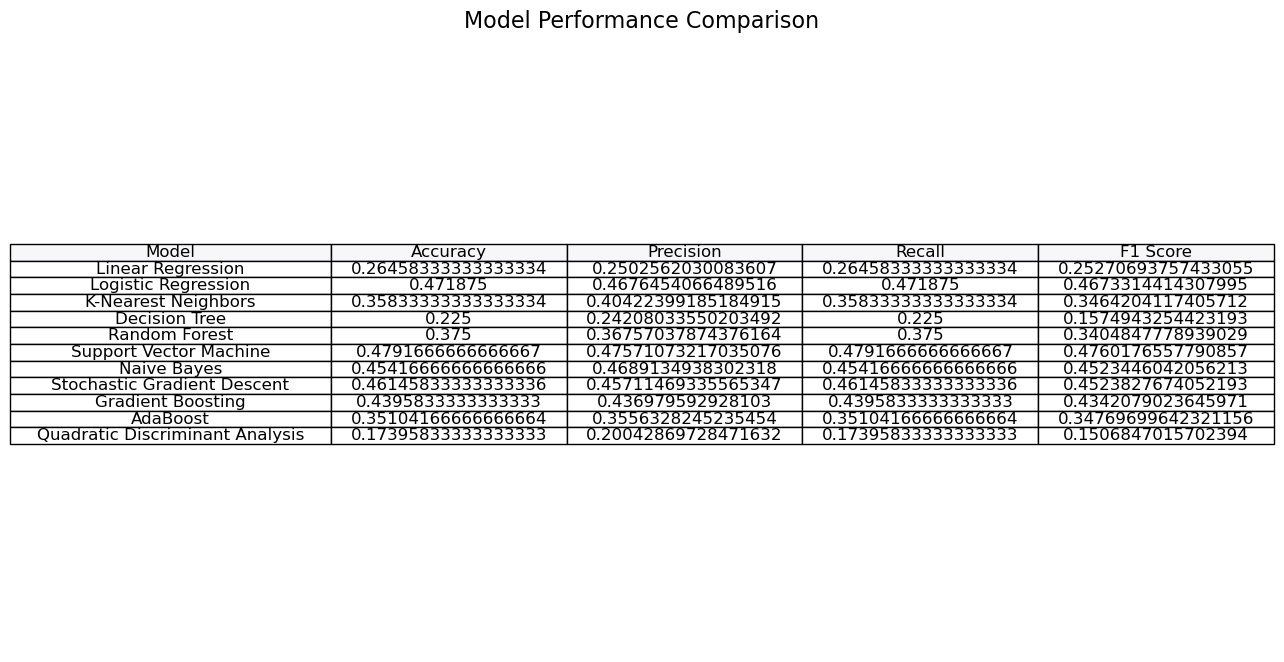

In [27]:
import matplotlib.pyplot as plt

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results.values, colLabels=results.columns, cellLoc='center', loc='center', colColours=['#f7f7f9']*len(results.columns))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results.columns))))

plt.title("Model Performance Comparison", fontsize=16)
plt.show()